# Cover Sheet

* **Subject Title:** Introduction to Data Mining



# Assignment 

### Task Breakdown

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo


#fetch dataset
adult = fetch_ucirepo(id =2)

#data (as pandas dataframes)
x = adult.data.features
y = adult.data.targets

# 1. Data Cleaning
Complete all steps of data cleaning to ensure that your data is in the right format for modelling. This includes, but not limited to:
 * Ensure that the dataset is free more missing values (Nas)
 * Confirm that the dataset contains no duplicate records
 * Verify that all values in the dataset are accurate and consistent



### 1.1 Cleannig the dataset by ensuring it is free from missing values(NaNs)

As a first step in data cleaning, we are going to check if the data frame x = adult.data.features and y = adult.data.targets have missing values ​​(NAN). To do this, we are going to use the .isna() function. This function returns a boolean object of the same size indicating whether the values ​​are NA. (Pandas.DataFrame.isna — Pandas 2.2.2 Documentation, n.d.). 

In [3]:
# Step 1 : Check for missing values (NaNs)

print("Display the missing values in features: \n", x.isna().sum())
print("\nDisplay the missing values in targets: \n", y.isna().sum())

Display the missing values in features: 
 age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

Display the missing values in targets: 
 income    0
dtype: int64


As we can see above, there are some variables that were returned as TRUE for NAN. Therefore, the following code fills the missing values ​​in the categorical columns.

In [4]:
# Step 2 : Missing values found workclass, Occupation and native-country.  Handle missing values ​​by filling the values ​​with the column (mode) dute to that they are categorical values 

x['workclass'].fillna(x['workclass'].mode()[0],inplace=True)
x['occupation'].fillna(x['occupation'].mode()[0], inplace=True)
x['native-country'].fillna(x['native-country'].mode()[0],inplace=True)



C:\Users\harol\AppData\Local\Temp\ipykernel_3504\4257164644.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['workclass'].fillna(x['workclass'].mode()[0],inplace=True)
C:\Users\harol\AppData\Local\Temp\ipykernel_3504\4257164644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['workclass'].fillna(x['workclass'].mode()[0],inplace=True)

In [5]:
# Check if all missing values ​​have been completed
print("Display the missing values in features: \n", x.isna().sum())
print("\nDisplay the missing values in targets: \n", y.isna().sum())


Display the missing values in features: 
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

Display the missing values in targets: 
 income    0
dtype: int64


### 1.2 Confirm that the dataset contains no duplicate records

At this stage, we need to check if the data frame contains duplicate values. For this, we will use the ExtensionArray.duplicated(keep='first') function which returns a boolean ndarray denoting duplicate values.(pandas, 2024)ated 

In [6]:
# Check for duplicate records
duplicates = x.duplicated()

# Count and display the number of number of duplicate

nums_duplicates = duplicates.sum()
print(f"Number of duplicate recobrds: {nums_duplicates}")

Number of duplicate recobrds: 54


We proceed to remove the duplicate values ​​using the data frame function using the drop_duplicates() function which returns a data frame with duplicate rows removed. We then check the shape of the data frame to make sure they are equal to fit the model.

In [7]:
# Delete duplicate records
x_cleaned = x.drop_duplicates()

# We must ensure that target values keep the same shape as the cleaned_x
y_cleaned = y.loc[x_cleaned.index]

# Verify the shapes after  removing duplicate records. 
print("\nShape after removing duplicates:")
print(f"Feactures shape: {x_cleaned.shape}")
print(f"Targets shape: {y_cleaned.shape}")


Shape after removing duplicates:
Feactures shape: (48788, 14)
Targets shape: (48788, 1)


### 1.3 Verify that all values in the dataset are accurate and consistent

The dtypes function returns the data type of each column. This step is necessary to identify categorical and numeric values.

#### Data type

In [8]:
#Check The data type
print(x_cleaned.dtypes)


age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object


### Check for outliers

This validation can flag any input errors in the data point, for example if there are some values ​​with 200 in the age column while the data point is 0 to 90. It can help in correcting them. For this purpose, we are going to install the Seaborn package which is a data visualization library that provides a high-level, informative interface for drawing attractive and informative statistical graphs. (Seaborn: Statistical Data Visualization, n.d.)

In [9]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


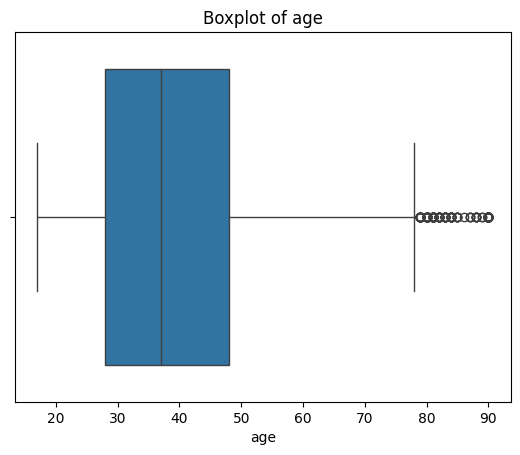

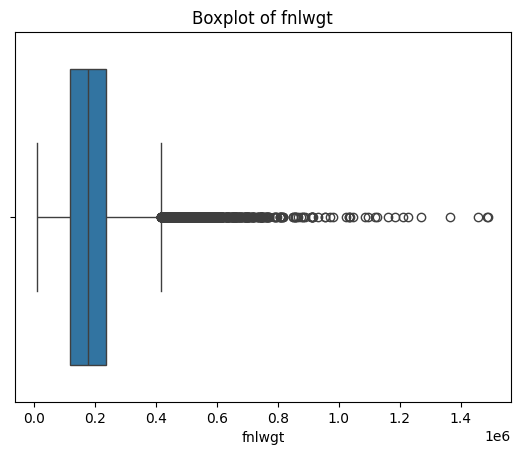

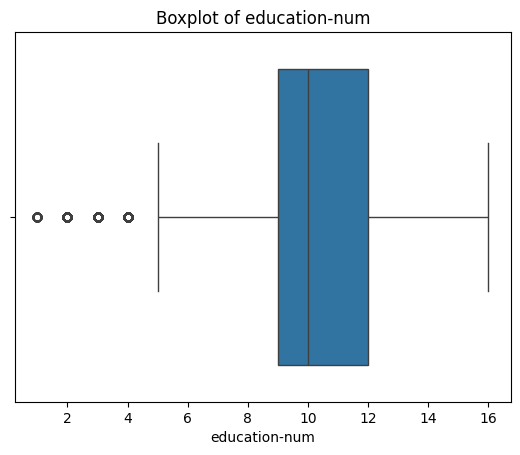

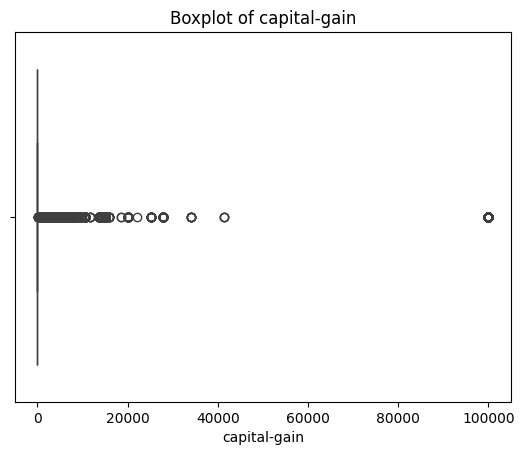

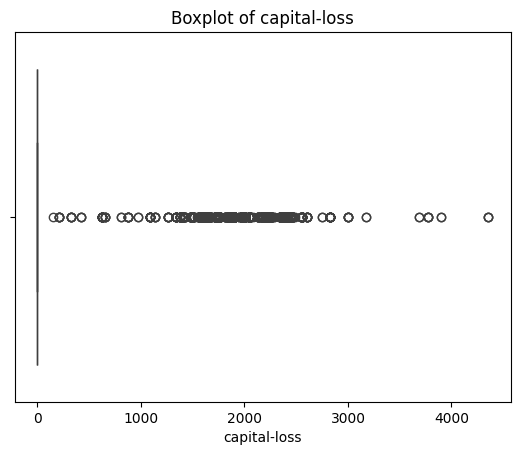

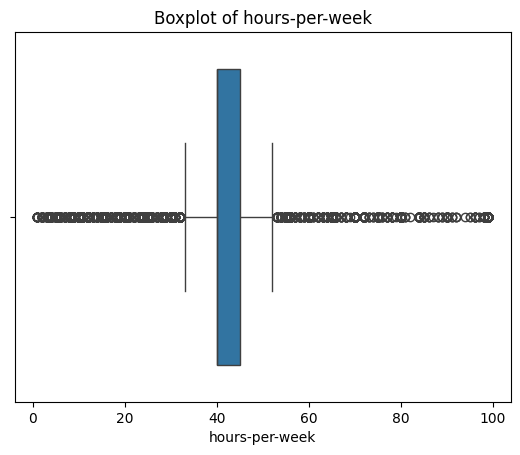

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxpltos to check outliers in int64(numeric) columns
int64_columns = x_cleaned.select_dtypes(include=['number']).columns

for column in int64_columns:
    sns.boxplot(x=x_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

### Cheking the rows  with possible outlerts

The graph shows that there are some values ​​>90 in working hours per week. It seems interesting, but maybe it is true. That is how we lived.

In [11]:

import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
adult = fetch_ucirepo(id=2)

# Convert data to a DataFrame
df = pd.DataFrame(x_cleaned, columns=adult.data.feature_names)

# Add target variable to the DataFrame
df['target'] = adult.data.targets

# Filter the rows where 'hours per week ' column has the value between 95 & 110 hours
rows_with_hours_per_week = df[(df['hours-per-week'] >=95) & (df['hours-per-week'] <=110)]

# Display the rows
print(rows_with_hours_per_week)



       age         workclass  fnlwgt     education  education-num  \
272     50  Self-emp-not-inc   30653       Masters             14   
935     37           Private  176900       HS-grad              9   
1172    25           Private  404616       Masters             14   
1887    55  Self-emp-not-inc  184425  Some-college             10   
2920    63  Self-emp-not-inc   26904       HS-grad              9   
...    ...               ...     ...           ...            ...   
47050   31           Private  170513       HS-grad              9   
47107   32         State-gov  246282     Doctorate             16   
47376   49           Private  111282       7th-8th              4   
47760   48           Private  250736       HS-grad              9   
48470   41           Private  173651    Assoc-acdm             12   

           marital-status        occupation   relationship   race     sex  \
272    Married-civ-spouse   Farming-fishing        Husband  White    Male   
935    Married-ci

# 2. Data Preprocessing  



After cleaning the data, we are going to prepare it so that the algorithm can read it. In the previous step, we identified each data type for the variable. The next step is to apply different techniques for each data type. For categorical data, we will use Encode and for numerical data, we will normalize the data.

### 2.1 Encode all categorical variables appropriately

Let's display tghe data frame to identify the data type.

In [12]:
print(x_cleaned.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object



To start, we need to convert the data frame into a  dictionary using the DataFrame.to_dict(orient = 'dict') the function  prepare the data frame before encoding the categorical data.

In [13]:
import pandas as pd


# Convert DataFrame to dictionary
data_dict = x_cleaned.to_dict(orient='list')

# Print the dictionary (or a part of it, since it's large)
for key, value in data_dict.items():
    print(f"Column: {key}, Data: {value[:5]}")  # Display first 5 values for brevity


Column: age, Data: [39, 50, 38, 53, 28]
Column: workclass, Data: ['State-gov', 'Self-emp-not-inc', 'Private', 'Private', 'Private']
Column: fnlwgt, Data: [77516, 83311, 215646, 234721, 338409]
Column: education, Data: ['Bachelors', 'Bachelors', 'HS-grad', '11th', 'Bachelors']
Column: education-num, Data: [13, 13, 9, 7, 13]
Column: marital-status, Data: ['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-civ-spouse', 'Married-civ-spouse']
Column: occupation, Data: ['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners', 'Handlers-cleaners', 'Prof-specialty']
Column: relationship, Data: ['Not-in-family', 'Husband', 'Not-in-family', 'Husband', 'Wife']
Column: race, Data: ['White', 'White', 'White', 'Black', 'Black']
Column: sex, Data: ['Male', 'Male', 'Male', 'Male', 'Female']
Column: capital-gain, Data: [2174, 0, 0, 0, 0]
Column: capital-loss, Data: [0, 0, 0, 0, 0]
Column: hours-per-week, Data: [40, 13, 40, 40, 40]
Column: native-country, Data: ['United-States', 'United-States',

Once we have the data set contained in a dictionary, we proceed to apply One-Hot-Encoding

In [14]:
import pandas as pd


# Convert data_dict back to a DataFrame
x_cleaned_df = pd.DataFrame(data_dict)

#Identify the categorical columns

categorical_columns = ['workclass', 'education', 'marital-status',
                       'occupation', 'relationship', 'race',
                       'sex', 'native-country']

# Apply One-Hot Encoding to the 'workclass' column
x_encoded = pd.get_dummies(x_cleaned_df, columns=categorical_columns, prefix=categorical_columns)

# If needed, convert the encoded DataFrame back to a dictionary
data_dict_encoded = x_encoded.to_dict(orient='list')

# Print a portion of the encoded DataFrame and dictionary for verification
print("\nEncoded DataFrame:")
print(x_encoded.head())  # Display the first few rows of the DataFrame

print("\nEncoded Data Dictionary:")
for key, value in data_dict_encoded.items():
    print(f"Column: {key}, Data: {value[:5]}")  # Display first 5 values for brevity



Encoded DataFrame:
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0        False                  False                False   
1        False                  False                False   
2        False                  False                False   
3        False                  False                False   
4        False                  False                False   

   workclass_Never-worked  ...  native-country_Portugal  \
0                   False  ...                    False   
1                   False 

### 2.2 Normalise continuous variables if necessary 

Now, we need to normalize the data, which means transforming the values ​​into a similar scale.

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Convert data_dict back to a DataFrame
x_cleaned_df = pd.DataFrame(data_dict)

# Identify the categorical columns
categorical_columns = ['workclass', 'education', 'marital-status',
                       'occupation', 'relationship', 'race',
                       'sex', 'native-country']

# Apply One-Hot Encoding to the categorical columns
x_encoded = pd.get_dummies(x_cleaned_df, columns=categorical_columns, prefix=categorical_columns)

# Identify the continuous (numerical) columns
continuous_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Choose the normalization method: Min-Max Scaling  Normalization

scaler = MinMaxScaler()

# Normalize the continuous columns
x_encoded[continuous_columns] = scaler.fit_transform(x_encoded[continuous_columns])

# If needed, convert the encoded and normalized DataFrame back to a dictionary
data_dict_encoded = x_encoded.to_dict(orient='list')

# Print a portion of the encoded and normalized DataFrame and dictionary for verification
print("\nEncoded and Normalized DataFrame:")
print(x_encoded.head())  # Display the first few rows of the DataFrame

print("\nEncoded and Normalized Data Dictionary:")
for key, value in data_dict_encoded.items():
    print(f"Column: {key}, Data: {value[:5]}")  # Display first 5 values for brevity



Encoded and Normalized DataFrame:
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.301370  0.044131       0.800000       0.02174           0.0   
1  0.452055  0.048052       0.800000       0.00000           0.0   
2  0.287671  0.137581       0.533333       0.00000           0.0   
3  0.493151  0.150486       0.400000       0.00000           0.0   
4  0.150685  0.220635       0.800000       0.00000           0.0   

   hours-per-week  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0        0.397959        False                  False                False   
1        0.122449        False                  False                False   
2        0.397959        False                  False                False   
3        0.397959        False                  False                False   
4        0.397959        False                  False                False   

   workclass_Never-worked  ...  native-country_Portugal  \
0                   False  .

### 2.3 Split the dataset into training and testing sets

The training data  set is used to train the model implemented and the test data are commonly used to identify different result and the compare with the model performace. (Gillis, n.d.) 

The module sklearn.model_selection.train_test_split() Split arrays into random train and test subsets.(Train_test_split — Scikit-Learn 1.5.1 Documentation, n.d.)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



In [17]:
# Create a variable y and x for the clean data that is normalized and encoded.
y = y_cleaned
x= x_encoded

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# Display the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (39030, 108)
Testing features shape: (9758, 108)
Training target shape: (39030, 1)
Testing target shape: (9758, 1)


## 3. Model Selection and Training 
 

The classification models that  we will use for this task are logistic regression and support vector Machine.For optimization grid search approach will be used for the model and for evaluate the best performing model will be based on its accuracy.

## 3.1 Logistic Regression model

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization penalty
    'solver': ['liblinear', 'saga']  # Solvers that support l1 and elasticnet penalties
}

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# Use the best model to predict on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report gives precision, recall, f1-score, and support
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\Users\harol\.virtualenvs\Ejecutables-sNxlcJa2\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\harol\.virtualenvs\Ejecutables-sNxlcJa2\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\harol\.virtualenvs\Ejecutables-sNxlcJa2\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\harol\.virtualenvs\Ejecutabl

Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.5692764910842386

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.59      0.91      0.72      4877
      <=50K.       0.54      0.06      0.11      2486
        >50K       0.49      0.60      0.54      1612
       >50K.       0.00      0.00      0.00       783

    accuracy                           0.57      9758
   macro avg       0.41      0.39      0.34      9758
weighted avg       0.51      0.57      0.48      9758


Confusion Matrix:
[[4438   91  347    1]
 [2151  156  178    1]
 [ 627   19  961    5]
 [ 268   22  493    0]]


### 3.2 Support vector Machine Code

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Support Vector Machine model
svm_model = SVC()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['poly', 'rbf', 'linear'],  # Types of kernels to test
    'degree': [1, 2, 3, 4],  # Degree of the polynomial kernel function
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

# The best model to predict on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report gives precision, recall, f1-score, and support
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 96 candidates, totalling 480 fits


KeyboardInterrupt: 

In [24]:
from sklearn.svm import SVC

In [25]:
# Initialize the Support Vector Machine model
svm_model = SVC(kernel= 'poly', degree= 1)

# Fit the model on the training data
svm_model.fit(X_train, y_train)



c:\Users\harol\.virtualenvs\Ejecutables-sNxlcJa2\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(degree=1, kernel='poly')

In [26]:
# Predict on the test data
y_pred = svm_model.predict(X_test)

In [27]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report gives precision, recall, f1-score, and support
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5558516089362574

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.57      0.93      0.71      4877
      <=50K.       0.00      0.00      0.00      2486
        >50K       0.48      0.54      0.51      1612
       >50K.       0.00      0.00      0.00       783

    accuracy                           0.56      9758
   macro avg       0.26      0.37      0.30      9758
weighted avg       0.37      0.56      0.44      9758


Confusion Matrix:
[[4550    0  327    0]
 [2324    0  162    0]
 [ 738    0  874    0]
 [ 315    0  468    0]]


c:\Users\harol\.virtualenvs\Ejecutables-sNxlcJa2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harol\.virtualenvs\Ejecutables-sNxlcJa2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harol\.virtualenvs\Ejecutables-sNxlcJa2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

#### Compare their performance of the Two models Logistic regression and Suport vector Machine. 

Based on the result above we will identify and select the best performing model basde on accuracy. For that propose we compare the accuracy score of the logistic Regression model and the support Vector machine (SVM). The accurary measures indicate the proportion of correctly classified instances among the total instances. 


Model Accuracy Comparation:

1. Logistic Regresion Model:
    * Accuracy: 0.5684

2. Support Vector Machine Model:
    * Accuracy: 0.5559

Conclusion: 

The best performing model: The logistic regresion model performs moderately better with an accuracy of 0.5684 comparated to the SVM models accuracy of 0.5559.

Decision: Based on accuracy, The best performs model is Logistic regresion. 

## 4  Model Evaluation and Comparison 


*  Evaluate and compare the two models using at least 2 [TWO] performance metrics on the testing set.

The two performance metrics of the test set that we are going to use in the models are accuracy and misclassification rate. While  accuracy represents the proportion of all classifications that were correct, whether positive or negative.  (Classification: Accuracy, Recall, Precision, and Related Metrics | Machine Learning, 2024). 
The Misclasification rate refer to the proportion of incorrectly classied of objects (ScienceDirect., 2000)


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Support Vector Machine model
svm_model = SVC(kernel='poly', degree=1)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

print("Accuracy:", accuracy)
print("Misclassification Rate:", misclassification_rate)

# Classification report gives precision, recall, f1-score, and support
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


c:\Users\harol\.virtualenvs\Ejecutables-sNxlcJa2\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5558516089362574
Misclassification Rate: 0.4441483910637426

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.57      0.93      0.71      4877
      <=50K.       0.00      0.00      0.00      2486
        >50K       0.48      0.54      0.51      1612
       >50K.       0.00      0.00      0.00       783

    accuracy                           0.56      9758
   macro avg       0.26      0.37      0.30      9758
weighted avg       0.37      0.56      0.44      9758


Confusion Matrix:
[[4550    0  327    0]
 [2324    0  162    0]
 [ 738    0  874    0]
 [ 315    0  468    0]]


c:\Users\harol\.virtualenvs\Ejecutables-sNxlcJa2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harol\.virtualenvs\Ejecutables-sNxlcJa2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harol\.virtualenvs\Ejecutables-sNxlcJa2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

Conclusion 

Based on the above result, we can see that they are complementary. The sum of accuracy and misclassification rate is equal to 1.

Model comparation:

1. Accuracy measure: 0.5558
  
2. Misclassification Rate:  0.4441


How could the models be better improved?


Improving performance is a crucial part of model design. In this assessment, we use hyperparameter tuning and grid search, which are used to exploit a wide range of hyperparameters in a systematic way. This process allows data scientists to tune the model performance to get an optimal result. (What Is Hyperparameter Tuning? - Hyperparameter Tuning Methods Explained, n.d.)

Another technique that can be used to improve the model is feature engineering, which identifies and selects the most relevant features, significantly reducing the margin. Also, data processing ensures that all values ​​are correctly scaled, and finally, Roc - AUC model evaluation, which evaluates the model when it comes to imbalanced classes.

References

Classification: Accuracy, recall, precision, and related metrics | Machine Learning. (2024, August 15). Google for Developers. Retrieved August 31, 2024, from https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall

Gillis, A. S. (n.d.). What is data splitting and why is it important? TechTarget. Retrieved August 31, 2024, from https://www.techtarget.com/searchenterpriseai/definition/data-splitting

pandas. (2024). pandas.api.extensions.ExtensionArray.duplicated. https://pandas.pydata.org/docs/reference/api/pandas.api.extensions.ExtensionArray.duplicated.html#pandas.api.extensions.ExtensionArray.duplicated

pandas.DataFrame.isna — pandas 2.2.2 documentation. (n.d.). Pandas. Retrieved August 30, 2024, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html

pandas.DataFrame.to_dict — pandas 2.2.2 documentation. (n.d.). Pandas. Retrieved August 30, 2024, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html#pandas.DataFrame.to_dict

ScienceDirect. (2000). Misclassification Rate. https://www.sciencedirect.com/topics/computer-science/misclassification-rate#:~:text=Misclassification%20Rate%20refers%20to%20the,of%20the%20Correct%20Classification%20Rate.

seaborn: statistical data visualization. (n.d.). seaborn: statistical data visualization — seaborn 0.13.2 documentation. Retrieved August 30, 2024, from https://seaborn.pydata.org/

train_test_split — scikit-learn 1.5.1 documentation. (n.d.). Scikit-learn. Retrieved August 31, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

What is Hyperparameter Tuning? - Hyperparameter Tuning Methods Explained. (n.d.). AWS. Retrieved August 31, 2024, from https://aws.amazon.com/what-is/hyperparameter-tuning/

